#Laboratorium 6
###Metody wielokrokowe

#Zadanie 1
####Implementacja metody Adamsa-Bashfortha (rzędu 2)
Zaimplementowano metodę dwukrokową Adamsa-Bashfortha do rozwiązywania równania różniczkowego.

**Dane wejściowe**:
* Funkcja f(x, y), warunek początkowy y(0) = 1
* Przedział [0, 1], krok h = 0.1
* Początkowe dwa punkty wyznaczone np. metodą RK4

**Pseudokod**:
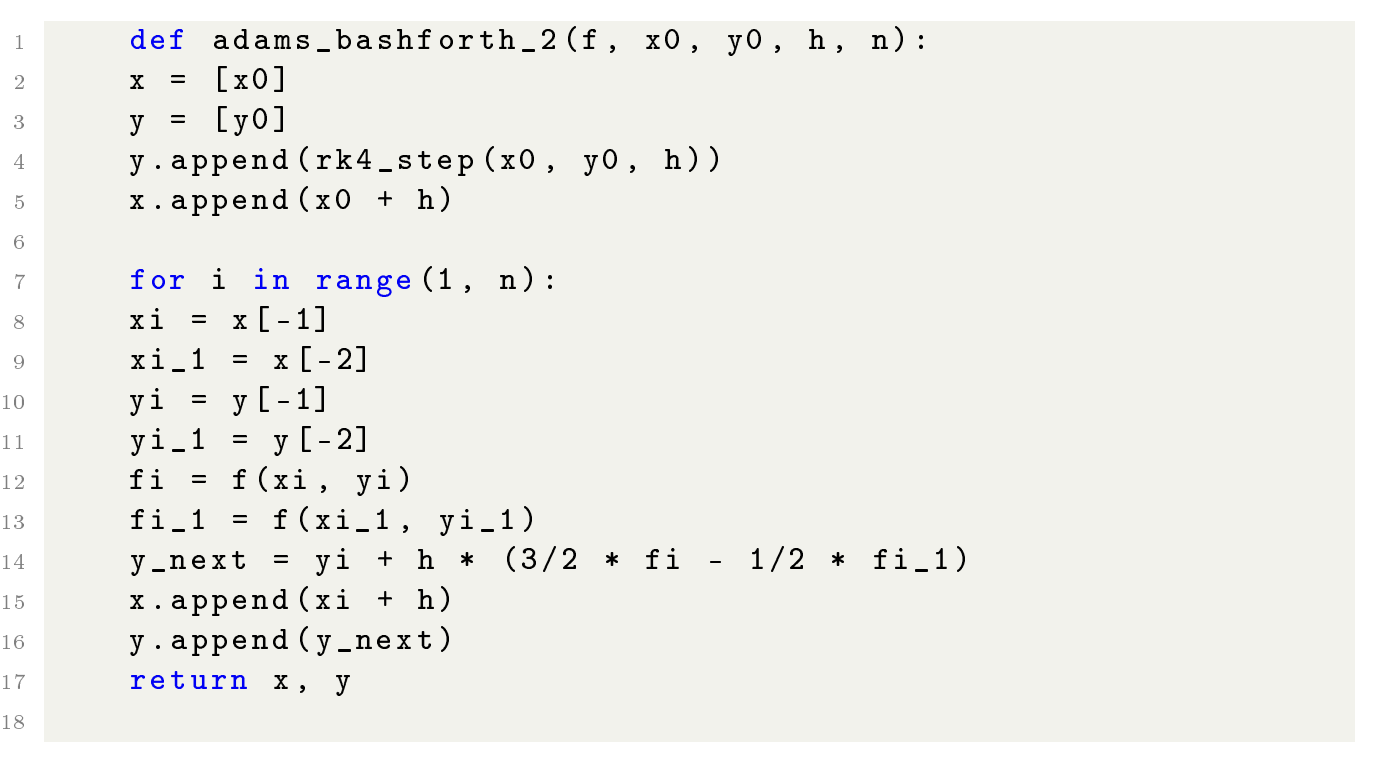

###**Opis metody**
Metoda Adamsa-Bashfortha jest jawną metodą wielokrokową, która wykorzystuje wartości funkcji z poprzednich kroków do obliczenia wartości w następnym kroku.

Zaimportowanie niezbędnych bibliotek oraz zdefiniowanie funkcji f(x, y) potrzebnej do podalszych obliczeń:

In [1]:
import numpy as np

def f(x, y):
    return x + y

Implementacja funkcji odpowiadającej za jeden krok metody RK4:

In [2]:
def rk4_step(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + h/2, y + h/2 * k1)
    k3 = f(x + h/2, y + h/2 * k2)
    k4 = f(x + h, y + h * k3)
    return y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

Implementacja funkcji obliczającą metodą Adamsa-Bashfortha:

In [3]:
def adams_bashforth_2(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    # Pierwszy krok za pomocą RK4
    y[1] = rk4_step(f, x[0], y[0], h)
    x[1] = x[0] + h
    # Kolejne kroki metodą Adamsa-Bashfortha 2. rzędu
    for i in range(1, n):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * (1.5 * f(x[i], y[i]) - 0.5 * f(x[i-1], y[i-1]))
    return x, y

Testowanie metody i wyświetlenie wyników:

In [4]:
x0 = 0
y0 = 1
h = 0.1
n = int(1/h)

x_vals, y_vals = adams_bashforth_2(f, x0, y0, h, n)

for x, y in zip(x_vals, y_vals):
    print(f"x = {x:.1f}, y = {y:.6f}")

x = 0.0, y = 1.000000
x = 0.1, y = 1.110342
x = 0.2, y = 1.241893
x = 0.3, y = 1.397660
x = 0.4, y = 1.580214
x = 0.5, y = 1.792363
x = 0.6, y = 2.037207
x = 0.7, y = 2.318170
x = 0.8, y = 2.639035
x = 0.9, y = 3.003982
x = 1.0, y = 3.417627


###**Analiza wyników**
Metoda Adamsa-Bashfortha drugiego rzędu wymaga znajomości dwóch początkowych wartości rozwiązania. W powyższej implementacji pierwszą wartość y0 mamy mamy z warunku początkowego, natomiast y1obliczamy za pomocą metody RK4, która zapewnia wysoką dokładność. Następnie, korzystając z wzoru metody Adamsa-Bashfortha, iteracyjnie obliczamy kolejne wartości yn.

#Zadanie 2
####Zastosowanie predyktora-korektora
Zaimplementowano predyktor (AB2) i korektor (AM2) dla równania dy/dx = x + y, y(0) = 1.

**Dane wejściowe**:
* Początkowe punkty wyznaczone metodą RK4.
* Przedział [0, 1], krok h = 0.1

**Pseudokod**:
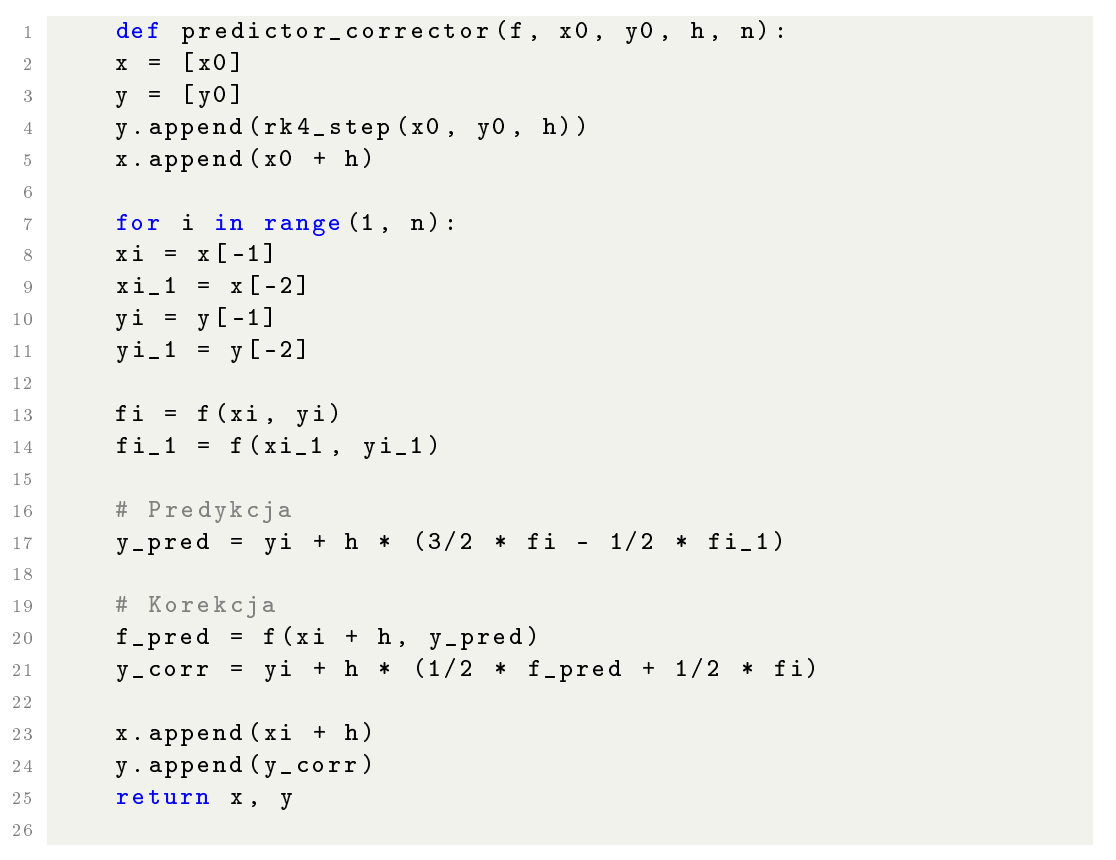

###**Opis metod**
#####**Metoda Adamsa-Bashfortha drugiego rzędu (AB2)**
Jest to jawna metoda dwukrokowa, która przybliża wartość funkcji w kolejnym kroku na podstawie wartości z dwóch poprzednich punktów.

#####**Metoda Adamsa-Moultona drugiego rzędu (AM2)**
Jest to niejawna metoda dwukrokowa, stosowana jako korektor w schemacie predyktor-korektor.


Zdefiniowanie funkcji i metody obliczającej jeden krok metody RK4:

In [5]:
def f(x, y):
    return x + y

def rk4_step(f, x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

Funkcja odpowiadająca za korektor-predyktor:

In [6]:
def predictor_corrector(f, x0, y0, h, n):
    x = [x0]
    y = [y0]

    y.append(rk4_step(f, x0, y0, h))
    x.append(x0 + h)

    for i in range(1, n):
        xi = x[-1]
        xi_1 = x[-2]
        yi = y[-1]
        yi_1 = y[-2]

        fi = f(xi, yi)
        fi_1 = f(xi_1, yi_1)

        # Predykcja (AB2)
        y_pred = yi + h * (3/2 * fi - 1/2 * fi_1)

        # Korekcja (AM2)
        f_pred = f(xi + h, y_pred)
        y_corr = yi + h * (1/2 * f_pred + 1/2 * fi)

        x.append(xi + h)
        y.append(y_corr)

    return x, y

Obliczenie i wyświetlenie wyników

In [7]:
x0 = 0
y0 = 1
h = 0.1
n = int(1/h)

x_vals, y_vals = predictor_corrector(f, x0, y0, h, n)

for xi, yi in zip(x_vals, y_vals):
    print(f"x = {xi:.1f}, y ≈ {yi:.6f}")

x = 0.0, y ≈ 1.000000
x = 0.1, y ≈ 1.110342
x = 0.2, y ≈ 1.242953
x = 0.3, y ≈ 1.400045
x = 0.4, y ≈ 1.584192
x = 0.5, y ≈ 1.798243
x = 0.6, y ≈ 2.045344
x = 0.7, y ≈ 2.328973
x = 0.8, y ≈ 2.652974
x = 0.9, y ≈ 3.021596
x = 1.0, y ≈ 3.439535


###**Wyniki**
Wynikiem działania programu jest lista wartości x oraz odpowiadających im przybliżonych wartości y.

#Zadanie 3
####Porównianie z RK4
Porownano wyniki metody predyktor-korektor z metodą RK4 dla równania dy/dx = x + y, y(0) = 1, krok h = 0.1.

**Dane wyjściowe**:
* Tabela błędów w punktach siatki
* Wykres rozwiązania przybliżonego vs dokładnego

###**Cel zadania**
Celem zadania jest porównanie wyników dwóch popularnych metod numerycznych służących do rozwiązywania równań różniczkowych zwyczajnych:
* Metoda predyktor-korektor
* Metoda Rungego-Kutty czwartego rzędu (RK4)

###**Opis metod**
* **Metoda predyktor-korektor** jest prostszą techniką, która daje przyzwoite wyniki, ale jest mniej dokładna w porównaniu do bardziej zaawansowanych metod, takich jak RK4.
* **Metoda RK4** jest jedną z najdokładniejszych metod numerycznych, która skutecznie radzi sobie z problemami różniczkowymi, zapewniając większą dokładność przy mniejszych błędach w przybliżeniach.

Zaimportowanie niezbędnych bibliotek i zdefiniowanie funkcji równania różniczkowego:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja równania różniczkowego
def f(x, y):
    return x + y

Dokładne rozwiązanie równania:

In [9]:
def exact_solution(x):
    return -1 + 2 * np.exp(x) - x

Metoda predyktor-korektor:

In [10]:
def predictor_corrector(h, x0, y0, x_end):
    n = int((x_end - x0) / h) + 1
    x_vals = np.linspace(x0, x_end, n)
    y_vals = np.zeros(n)
    y_vals[0] = y0

    for i in range(1, n):
        # Predyktor (Euler)
        y_pred = y_vals[i-1] + h * f(x_vals[i-1], y_vals[i-1])
        # Korektor (Euler)
        y_vals[i] = y_vals[i-1] + h / 2 * (f(x_vals[i-1], y_vals[i-1]) + f(x_vals[i], y_pred))

    return x_vals, y_vals

Metoda Rungego-Kutty czwartego rzędu (RK4):

In [11]:
def runge_kutta_4(h, x0, y0, x_end):
    n = int((x_end - x0) / h) + 1
    x_vals = np.linspace(x0, x_end, n)
    y_vals = np.zeros(n)
    y_vals[0] = y0

    for i in range(1, n):
        k1 = h * f(x_vals[i-1], y_vals[i-1])
        k2 = h * f(x_vals[i-1] + h/2, y_vals[i-1] + k1/2)
        k3 = h * f(x_vals[i-1] + h/2, y_vals[i-1] + k2/2)
        k4 = h * f(x_vals[i-1] + h, y_vals[i-1] + k3)

        y_vals[i] = y_vals[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x_vals, y_vals

Testowanie metod, ich porównanie, wyświetlenie i wizualizacja wyników:

Tabela błędów w punktach siatki:
x       | Błąd PC   | Błąd RK4
0.00 | 0.00000 | 0.00000
0.10 | 0.00034 | 0.00000
0.20 | 0.00076 | 0.00000
0.30 | 0.00125 | 0.00000
0.40 | 0.00185 | 0.00000
0.50 | 0.00255 | 0.00000
0.60 | 0.00338 | 0.00000
0.70 | 0.00436 | 0.00000
0.80 | 0.00550 | 0.00000
0.90 | 0.00684 | 0.00000
1.00 | 0.00840 | 0.00000
1.10 | 0.01021 | 0.00001
1.20 | 0.01231 | 0.00001
1.30 | 0.01474 | 0.00001
1.40 | 0.01754 | 0.00001
1.50 | 0.02077 | 0.00001
1.60 | 0.02448 | 0.00001
1.70 | 0.02875 | 0.00001
1.80 | 0.03364 | 0.00002
1.90 | 0.03924 | 0.00002
2.00 | 0.04564 | 0.00002


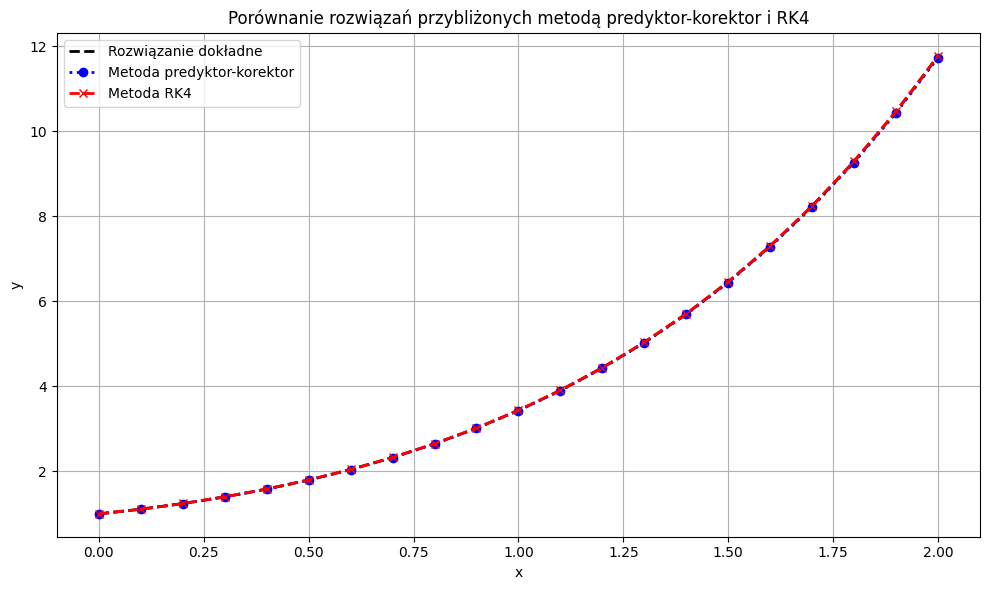

In [12]:
x0 = 0
y0 = 1
x_end = 2
h = 0.1

x_pc, y_pc = predictor_corrector(h, x0, y0, x_end)
x_rk, y_rk = runge_kutta_4(h, x0, y0, x_end)
x_exact = np.linspace(x0, x_end, 100)
y_exact = exact_solution(x_exact)

error_pc = np.abs(y_pc - exact_solution(x_pc))
error_rk = np.abs(y_rk - exact_solution(x_rk))

print("Tabela błędów w punktach siatki:")
print("x       | Błąd PC   | Błąd RK4")
for i in range(len(x_pc)):
    print(f"{x_pc[i]:.2f} | {error_pc[i]:.5f} | {error_rk[i]:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(x_exact, y_exact, label="Rozwiązanie dokładne", color="black", linestyle="--", linewidth=2)
plt.plot(x_pc, y_pc, label="Metoda predyktor-korektor", color="blue", marker="o", markersize=6, linestyle=":", linewidth=2)
plt.plot(x_rk, y_rk, label="Metoda RK4", color="red", marker="x", markersize=6, linestyle="--", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie rozwiązań przybliżonych metodą predyktor-korektor i RK4")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**Wyniki**
* Wyniki dla obu metod zostały przedstawione na wykresie, gdzie porównano rozwiązania przybliżone z rozwiązaniem dokładnym.
* Dla obu metod obliczono błędy w punktach siatki, które zostały pokazane w tabeli. Błędy dla metody RK4 są zdecydowanie mniejsze, co świadczy o jej wyższej dokładności.

###**Wizualizacja wyników**
Wykres przedstawia rozwiązanie dokładne jako linię przerywaną oraz rozwiązania przybliżone dla obu metod. Z wykresu widać, że metoda RK4 znacznie lepiej odwzorowuje rozwiązanie dokładne w porównaniu do metody predyktor-korektor.

###**Wnioski**
* Metoda RK4 daje bardziej precyzyjne wyniki w porównaniu do metody predyktor-korektor, zwłaszcza w dłuższych przedziałach.
* Metoda predyktor-korektor może być przydatna w sytuacjach, gdzie obliczenia muszą być szybkie, ale nie zależy nam na bardzo wysokiej dokładności.